In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('linear_train.csv')


In [22]:
features = pd.DataFrame(data)
features = features.drop(['label'], axis = 1)
features = features.drop(['Unnamed: 0'], axis = 1)
y = data.label
y = pd.DataFrame(y)

a = data.shape
n_features = features.shape[1]
n_samples = features.shape[0]

def norm_feat(features): 
    for i in features.columns:
        features[i] = ((features[i]-features[i].mean())/(features[i].max()-features[i].min()))
    return features


def get_gradient(features, error, lr):
    dm = lr*((np.dot(features.T, error))/(features.shape[0]))
    db =  lr*(np.mean(error))
    return dm, db

def update_parms(dm, db):
    global weight, bias
    weight = weight - dm
    bias = bias - db
    return weight, bias 

def get_prediction(features, weight, bias):
    y_pred = np.dot(features, weight) + float(bias)
    return y_pred


In [23]:
features = norm_feat(features)
weight = np.random.randn(n_features, 1)
bias = 0
lr = 2

y_pred = np.dot(features, weight) + bias
error = (y_pred - y)

cost = []

for i in range(250):
    error = (y_pred - y)
    dm, db = get_gradient(features, error, lr)
    weight, bias = update_parms(dm, db)
    y_pred = get_prediction(features, weight, bias)
    cost.append((np.mean((error**2)))/2)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[628.17877358]
 [545.18356231]
 [769.83242422]
 [ 13.81394333]
 [157.82538501]
 [207.68237979]
 [560.33899634]
 [270.11792309]
 [157.83346533]
 [800.17654862]
 [328.72444182]
 [297.06227448]
 [ 25.6295266 ]
 [343.09415122]
 [342.0593858 ]
 [408.28873035]
 [170.07729995]
 [285.40235043]
 [278.25579233]
 [324.54935247]] label   -6.412115e-11
dtype: float64


In [24]:
print(cost)
#print(features.T)


[label    30379.935469
dtype: float64, label    28731.683164
dtype: float64, label    27197.691413
dtype: float64, label    25769.266956
dtype: float64, label    24438.446993
dtype: float64, label    23197.932102
dtype: float64, label    22041.025751
dtype: float64, label    20961.579723
dtype: float64, label    19953.944847
dtype: float64, label    19012.926494
dtype: float64, label    18133.744359
dtype: float64, label    17311.996079
dtype: float64, label    16543.624319
dtype: float64, label    15824.886962
dtype: float64, label    15152.330099
dtype: float64, label    14522.763535
dtype: float64, label    13933.238574
dtype: float64, label    13381.027833
dtype: float64, label    12863.606916
dtype: float64, label    12378.637735
dtype: float64, label    11923.953349
dtype: float64, label    11497.544143
dtype: float64, label    11097.545245
dtype: float64, label    10722.225039
dtype: float64, label    10369.974693
dtype: float64, label    10039.298583
dtype: float64, label    97

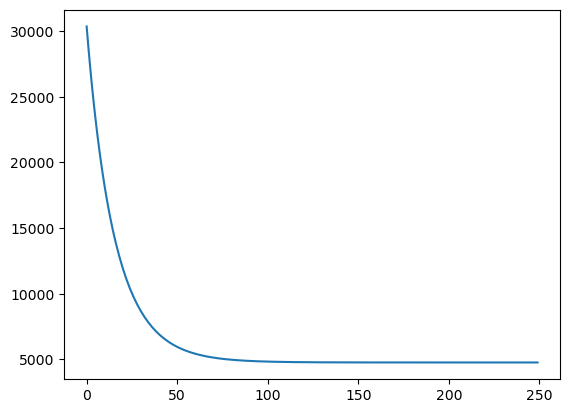

In [20]:
plt.plot(cost)

In [7]:
test_data = pd.read_csv('linear_test_data.csv')
t_features = (test_data)
t_y = pd.DataFrame(t_features.ids)
print(t_y.shape)

(20000, 1)


In [8]:
t_features = t_features.drop('ids', axis = 1)
t_features = pd.DataFrame(t_features)

t_y_pred = np.dot(t_features, weight) + float(bias)
t_y_pred = np.array(t_y_pred)
print(t_y.shape, t_y_pred.shape)

error = (t_y - t_y_pred)
print(error)


(20000, 1) (20000, 1)
                ids
0     -1.415070e+06
1     -1.257264e+06
2     -8.231809e+05
3     -1.132330e+06
4     -1.200320e+06
...             ...
19995 -8.550423e+05
19996 -1.172765e+06
19997 -1.054574e+06
19998 -1.156115e+06
19999 -1.212343e+06

[20000 rows x 1 columns]
